In [3]:
# libraries for data pre-processing
import pandas as pd
import numpy as np
import random as rnd

In [4]:
# loading the data
file = r'EmployeeisticFinal.csv'

In [5]:
# storing original data
original_data = pd.read_csv(file)
dummy_data = pd.read_csv(file)

original_data = original_data.dropna(axis=0, how='any')

In [6]:
# list to store the characteristics of the employee
categories = []
for col, value in original_data.iteritems():
    if value.dtype == 'float64':
        categories.append(col)
        
# storing object columns in another list
object_list = original_data.columns.difference(categories)

In [7]:
# making numeric data frame and removing unnecessary columns
original_cat = original_data[categories]
original_cat = original_cat.drop(['Age'], axis=1)

In [8]:
# numeric data showing
original_cat = pd.get_dummies(original_cat)

In [9]:
# collecting columns to encode in numeric
obj_features = ['client_review', 'hr_review', 'teammates_review']
original_obj = original_data[obj_features]

In [11]:
# encoding the column by using rank maping
original_map = {review : index for index, review in enumerate(['bad', 'average', 'good', 'excellent'])}

In [12]:
# replacing evry object data with numeric encoded data
original_data.client_review = original_data.client_review.map(original_map)
original_data.hr_review = original_data.hr_review.map(original_map)
original_data.teammates_review = original_data.teammates_review.map(original_map)

In [13]:
# based on numeric encoded data making new data frame for encoded value
features = ['client_review', 'hr_review', 'teammates_review']
original_data_obj_df = original_data[features]

In [14]:
name_df = original_data['Employees Name']

In [15]:
# concating the numeric and encoded data frames
frames = [name_df, original_cat, original_data_obj_df]
final_df = pd.concat(frames, axis=1)

In [19]:
# changing the columns name to remove (space, \n and \t) from the name
original_columns = final_df.columns
new_col = ['employees_name', 'completed_projects', 'client_rating', 'hr_rating', 'teammates_rating', 'profit', 'loss', 'c_cpp', 'c_sharp', 'php', 'python',\
          'java', 'javascript', 'networking', 'database_management', 'seo', 'debugging', 'digital_media_marketing', 'network_security', \
          'qa', 'ui_ux', 'project_planning', 'quality_control', 'budget_planning', 'best_performance', 'client_review', 'hr_review', 'teammates_review']

# renamming the columns
final_df = final_df.rename(columns=dict(zip(original_columns, new_col)))

# showing final data frame
columns = [final_df.columns]

In [20]:
total_employees = final_df.shape[0]

In [22]:
# feature list which needed to find the employee
features_of_python_developer = ['employees_name', 'profit', 'loss', 'python', 'client_review', 'hr_review', 'teammates_review']

In [46]:
# making new dataframe to codpy employees
employee_with_all_skills = final_df

In [159]:
# getting programming languages/skills
## apply your logic
inputs = input()
input_list = inputs.split()

# splitting the languages in the list
list_names = []
n = len(input_list)

# this code works for one programming language
for i in range(0, n):
    employees_fetched = employee_with_all_skills[(employee_with_all_skills[input_list[i]] > 6.5)]
# fetching the best employees based on profit, hr_review, client_review, teammates_review
employees_fetched = employees_fetched[(employees_fetched['profit'] >= 25.00) &
                                     (employees_fetched['hr_review'] >= 0.5) &
                                     (employees_fetched['client_review'] >= 0.5) &
                                     (employees_fetched['teammates_review'] >= 0.5)]
    

 java python


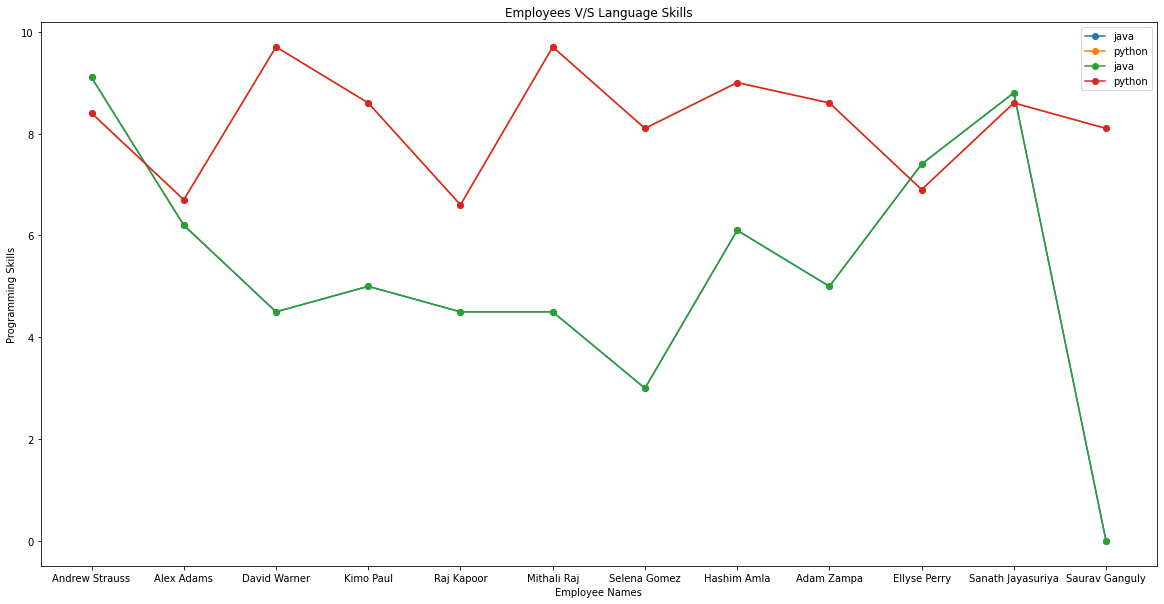

In [186]:
# importing the library to provide visualization
import matplotlib.pyplot as plt
import datetime
import os

file_path = os.path.join('F:/Employee_&_Language_Performance/Images')

# lists for x-ticks, y-ticks and labels
skill_values = []
names = []
labels = []

# appending the data to the different lists
for i in range(0, len(input_list)):
    skill_values.append(employees_fetched[input_list[i]])
    names.append(employees_fetched['employees_name'])
    labels.append(input_list[i])

# plotting figure and it's properties
plt.figure(figsize=(n*10,n*5))
plt.title('Employees V/S Language Skills')
plt.xlabel('Employee Names')
plt.ylabel('Programming Skills')

# zipping up y-ticks with labels to show the output
for i in range(0, len(skill_values)):
    for y_arr, label in zip(skill_values, labels):
        plt.plot(names[i], y_arr, '-o', label=label)
        plt.legend()

# saving the picture with name
date_string = datetime.datetime.now().strftime("%d%m%y%H%M")
name_string = "Image-" + date_string + '.png';


# saving the figure as png
plt.savefig(os.path.join(file_path, name_string), dpi=500)